In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]

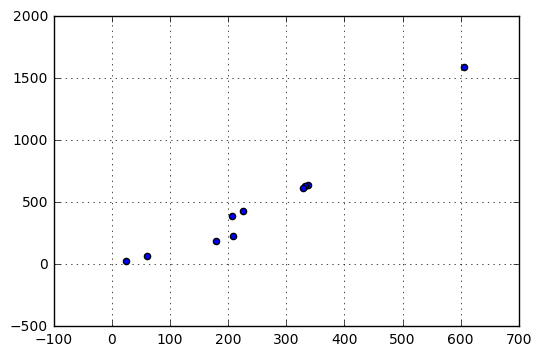

In [3]:
plt.scatter(x_data, y_data)
plt.grid()
plt.show()

In [4]:
def gradient_descent():
    iteration = 100000
    lr = 0.0000001
    w, b = -4, -120
    w_history = [w]
    b_history = [b]

    for i in range(iteration):
        dw = 0
        db = 0
        for x, y in zip(x_data, y_data):
            dw -= 2. * (y - w * x - b) * x
            db -= 2. * (y - w * x - b)
        w = w - lr * dw
        b = b - lr * db

        w_history.append(w)
        b_history.append(b)
        
    print("w:", w)
    print("b:", b)
    return w_history, b_history

In [5]:
class Plot:
    def __init__(self, w, b):
        self.w_history = w
        self.b_history = b
        
    def J(self, b, w):
        cost = 0
        for x, y in zip(x_data, y_data):
            cost += (y - b - w * x) ** 2
        return cost

    def plot_s(self):
        w_range = np.arange(-5, 5, 0.1)
        b_range = np.arange(-200, -99, 1)
        X, Y = np.meshgrid(b_range, w_range)
        plt.contourf(X, Y, self.J(X, Y), 100, cmap=plt.get_cmap("jet"))
        plt.plot([-188.4], [2.67], "x", color="orange", ms=12, markeredgewidth=3)
        plt.plot(b_history, w_history, "o-", markersize=5, linewidth=0.5, color="white")
        plt.xlabel(r"$b$", fontsize=16)
        plt.ylabel(r"$w$", fontsize=16)
        plt.show()

w: 2.4834016183794727
b: -123.6921749751593


C:\Users\robin\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\robin\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


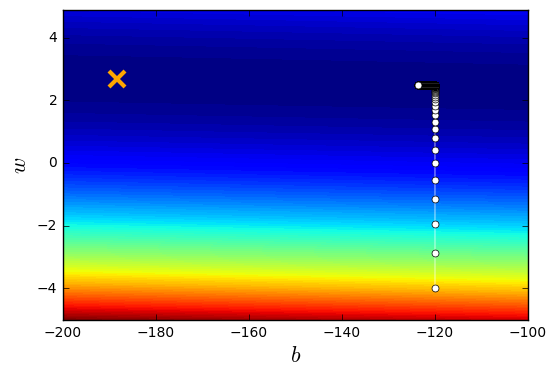

In [6]:
w_history, b_history = gradient_descent()
p = Plot(w_history, b_history)
p.plot_s()

In [7]:
def gradient_descent_with_ada():
    iteration = 100000
    lr = 1
    w, b = -4, -120
    w_history = [w]
    b_history = [b]

    lr_b = 0
    lr_w = 0

    for i in range(iteration):
        dw = 0
        db = 0
        for x, y in zip(x_data, y_data):
            dw -= 2. * (y - w * x - b) * x
            db -= 2. * (y - w * x - b)

        lr_b = lr_b + db ** 2
        lr_w = lr_w + dw ** 2
        w = w - lr/np.sqrt(lr_w) * dw
        b = b - lr/np.sqrt(lr_b) * db

        w_history.append(w)
        b_history.append(b)

    return w_history, b_history

C:\Users\robin\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\robin\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


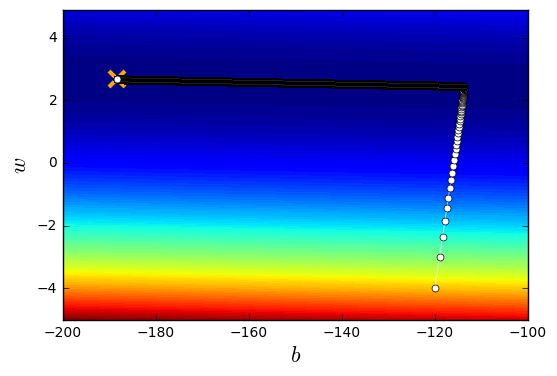

In [8]:
w_history, b_history = gradient_descent_with_ada()
p = Plot(w_history, b_history)
p.plot_s()